In [72]:
# ensemble model = birden fazla modelin birleşmesi
# random forest = birden fazla decision tree
# boosting = ağaç kendini geliştirip yeni ağaçlar oluşturuyor

In [1]:
from IPython.display import display, Image
image_url = "https://miro.medium.com/v2/resize:fit:953/1*wpVgt07J_TeH3jEdc3A50g.png"
display(Image(url=image_url))

In [74]:
# xgboost yüksek verilerde iyi performans


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score 

In [76]:
df = pd.read_csv("../dataset/LoanApprovalPrediction.csv")

In [77]:
df= df.drop("Loan_ID", axis=1)
# veri sayısı
# df.shape

In [78]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(2)

In [79]:
df = pd.get_dummies(df, dtype=int, columns=["Gender", "Married","Education", "Self_Employed", "Property_Area", "Loan_Status"], drop_first=True)
df.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,127.0,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1


In [80]:
y=df["Loan_Status_Y"]
x=df.drop("Loan_Status_Y", axis=1)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, train_size=0.75)

In [82]:
xg=xgb.XGBClassifier(random_state = 20)
model=xg.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [83]:
# # CROSS VAL SCORE
# scores = cross_val_score(model, x, y, cv=5, scoring="roc_auc")

# # Sonuçların görüntülenmesi
# print("AUC Skorları:", scores)
# print("Ortalama AUC:", scores.mean())

In [84]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[23 24]
 [14 89]]


In [85]:
# sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55        47
           1       0.79      0.86      0.82       103

    accuracy                           0.75       150
   macro avg       0.70      0.68      0.69       150
weighted avg       0.74      0.75      0.74       150



In [86]:
# ACCURACY SCORE
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7466666666666667


In [87]:
# pozitif sonuç doğruluğu
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.7876106194690266


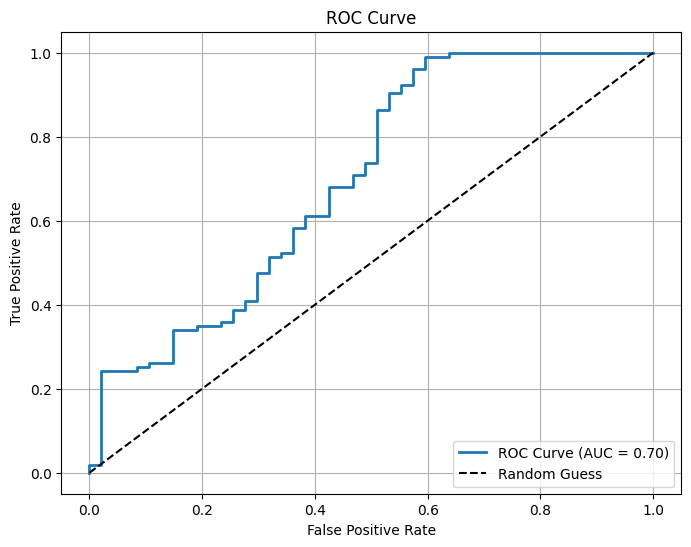

AUC Değeri: 0.70


In [88]:
# Tahmin edilen olasılıkları elde ediyoruz (pozitif sınıf için olasılıklar çünkü ROC eğrisi poztf sınıf performansı ölçmek için rasarlanmıştır)
y_scores = model.predict_proba(x_test)[:, 1] # [:, 1] çünkü negatif ve positif [0.3, 0.7] bize 0.7 lazım pozitif

# ROC ve AUC hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC Değeri Yazdırma
print(f"AUC Değeri: {roc_auc:.2f}")


In [89]:
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

FPR: [0.         0.         0.         0.0212766  0.0212766  0.08510638
 0.08510638 0.10638298 0.10638298 0.14893617 0.14893617 0.19148936
 0.19148936 0.23404255 0.23404255 0.25531915 0.25531915 0.27659574
 0.27659574 0.29787234 0.29787234 0.31914894 0.31914894 0.34042553
 0.34042553 0.36170213 0.36170213 0.38297872 0.38297872 0.42553191
 0.42553191 0.46808511 0.46808511 0.4893617  0.4893617  0.5106383
 0.5106383  0.53191489 0.53191489 0.55319149 0.55319149 0.57446809
 0.57446809 0.59574468 0.59574468 0.63829787 0.63829787 0.76595745
 0.80851064 1.        ]
TPR: [0.         0.00970874 0.01941748 0.01941748 0.24271845 0.24271845
 0.25242718 0.25242718 0.26213592 0.26213592 0.33980583 0.33980583
 0.34951456 0.34951456 0.3592233  0.3592233  0.38834951 0.38834951
 0.40776699 0.40776699 0.47572816 0.47572816 0.51456311 0.51456311
 0.52427184 0.52427184 0.58252427 0.58252427 0.61165049 0.61165049
 0.67961165 0.67961165 0.70873786 0.70873786 0.73786408 0.73786408
 0.86407767 0.86407767 0.9029

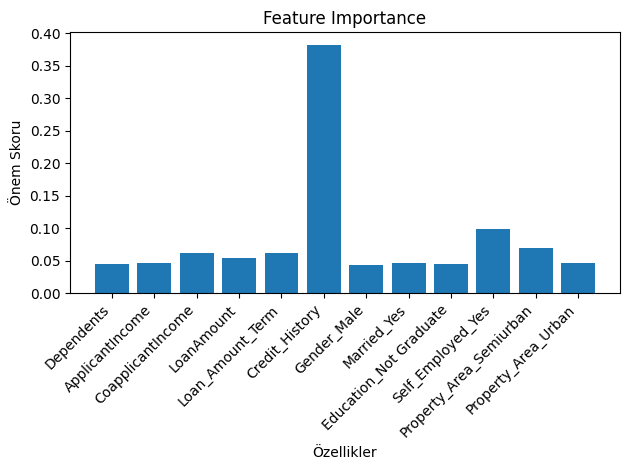

In [90]:
# ÖZELLİKLERİN ÖNEMİ
feature_names = x_train.columns 
importance = model.feature_importances_
plt.bar(feature_names, importance)
plt.xlabel("Özellikler")
plt.ylabel("Önem Skoru")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha="right")  # Özellik isimlerini döndürerek daha okunabilir yap
plt.tight_layout()  # Grafik elemanlarının üst üste binmesini engelle
plt.show()
